# Pandas
- Numpy 기반의 엑셀과 같은 행과 열로 구조를 다루는 파이썬 라이브러리
- 자료형으로 DataFrame, Series가 있다.

## Pandas 특징

### * 다른 라이브러리와의 연동으로 유용성이 높음.
- 데이터 분석을 위한 Scipy, Numpy, scikit-learn, statsmodel 등
- 데이터 시각화를 위한 matplotlib, seaborn 등
- 강력한 I/O : PyTables, SQLAlchemy, redis 등
### * 데이터 입출력 가능
- csv,excel,빅쿼리,spss,stata 등
### * 데이터의 유연한 변경 및 피벗

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 전체 데이터프레임에서 특정 행을 기준으로 가져오는 법

|Code|예제|설명|
|:---|:---|:---|
|df[df.column이름 조건]|df[df.sepal_length > 5]|조건에 맞는 rows 추출|
|df.index 조건|df.index==1|인덱스 조건에 맞는 rows 추출|
|df.drop_duplicates()||row의 중복값 제거|
|df.head(n)||첫n개 rows|
|df.tail(n)||뒤n개 rows|
|df.sample(frac=0.5)||frac비율만큼 랜덤샘플링|
|df.sample(n=10)||n만큼의 row를 랜덤샘플링|
|df.iloc[10:20]||row선택|
|df.nlargest(n,'컬럼이름')|df.nlargest(2,'a')|숫자컬럼에서 n만큼 큰 순서대로 추출|
|df.nsmallest(n,'컬럼이름')||숫자컬럼에서 n만큼 작은 순서대로 추출|
|df['컬럼'].str.contains("문자열")|df['country'].str.contains("us & korea")|특정문자열을 포함하는 row만|

In [4]:
df[df.sepal_length > 5].head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
10,5.4,3.7,1.5,0.2,setosa


In [5]:
# ~로 그 반대도 가져올 수 있음
df[~(df.sepal_length > 5)].head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


In [6]:
# sepal_length 가 가장 큰 4 rows
df.nlargest(4,'sepal_length')

,sepal_length,sepal_width,petal_length,petal_width,species
131,7.9,3.8,6.4,2.0,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica


### 전체 데이터프레임에서 특정 열을 기준으로 가져오는 법

|Code|설명|
|:---|:---|
|df[["컬럼명","컬럼명",..]]|여러 컬럼 선택|
|df['컬럼명'] or df.컬럼명|하나의 컬럼 선택|
|df.filter(regex='regex')|정규식에 맞는 컬럼만|
|df.loc[:,'특정컬럼1','특정컬럼2']|row와 특정컬럼1부터2까지|
|df.iloc[:,[1,2,5]]|컬럼위치에 따라 선택|
|df.loc[df['컬럼'] >4,['특정컬럼','특정컬럼]]|row에 조건 후 특정 컬럼|
|df[(df['컬럼']조건식) & (df['컬럼']조건식)]|조건에 ()로 다른 조건과 같이|

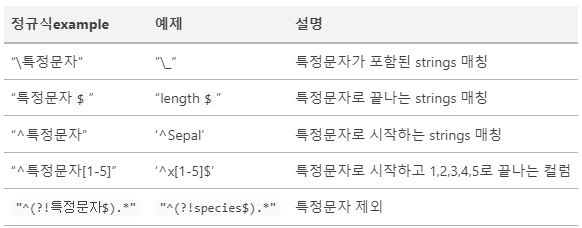

In [7]:
# sepal_length, petal_length 컬럼만 조회
df[['sepal_length','petal_length']].head(3)

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3


In [8]:
# _가 들어가는 컬럼 조회
df.filter(regex='\_').head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [9]:
# 2~5행 중 sepal_length 부터 petal_length 열까지 조회
df.loc[2:5,'sepal_length':'petal_length']

,sepal_length,sepal_width,petal_length
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
5,5.4,3.9,1.7


In [10]:
# 1,2,4번째 컬럼 조회
df.iloc[:,[1,2,4]].head(2)

,sepal_width,petal_length,species
0,3.5,1.4,setosa
1,3.0,1.4,setosa


In [11]:
# sepal_length 가 4 이상 중 sepal_width, petal_width 컬럼만 조회
df.loc[df['sepal_length']>=4,['sepal_width','petal_width']].head(3)

,sepal_width,petal_width
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2


In [12]:
# sepal_length 가 4 이상이고, petal_width 가 5 이하인 데이터 조회
df[(df['sepal_length']>=4) & df['petal_width']<=5].head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Query method
- 조건에 부합하는 데이터를 추출할 때 가독성과 편의성이 좋지만 df.loc, df.iloc보다 느리다고 한다.

##### df.query(조건식)
- 비교연산자(==,>,>=,<,<=,!=)
- in 연산자(in,==,not in,!=)
- 논리 연산자(and,or,not)
- 외부 변수(또는 함수) 참조 연산 : 외부 변수명 또는 함수명 앞에 @ 붙여 사용! ex) num =21gender = "male"df.query((age ==@num) and (sex!= @gender))
- 인덱스 검색 ex) df.query("index>=2")
- 문자열 부분 검색(str.contains,str.startwith,str.endswith) ex) df.query("colname.str.contains('찾는문자열')")

## Data Summarizing

|Code|설명|
|:---|:---|
|df.shape|row 갯수,column 갯수 반환|
|df['컬럼'].value_counts()|해당 컬럼에 유니크한 값 얼마나 있는지 확인|
|df['컬럼'].nunique()|유니크한 value의 갯수|
|len(df)|df에 row 갯수|
|df.describe()|기초통계, include=""옵션으로 특정값만 확인 가능|

|집계연산|설명|
|:---|:---|
|df.sum()|합계|
|df.median()|중앙값|
|df.quantile([0.25,0.75])|분위수|
|df.min(),df.max()|최소값,최대값|
|df.mean()|평균|
|df.var(),df.std()|분산,표준편차|
|df.corr(),df.cov()|상관관계,공분산|
|df.skew()|비대칭도|
|df.cumsum()|누적합|
|df.diff()|1차 산술 차 계산|

|숫자형 데이터가 아닌 카테고리형, 문자열 등|설명|
|:---|:---|
|df.count()|데이터 row 수|
|df.unique()|중복값 제거한 유니크한 데이터의 row 수|

- 주요함수옵션인 axis : 축 기본값=0, 0은 로우단위, 1은 컬럼단위

In [13]:
print(df.shape)
print(len(df))

(150, 5)
150


In [14]:
df['sepal_length'].value_counts().head(3)

5.0    10
5.1     9
6.3     9
Name: sepal_length, dtype: int64

In [15]:
df['species'].nunique()

3

In [16]:
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


## 커스텀 함수 적용하기 map,apply,applymap(feat.lambda)
- 전처리 및 계산에 많이 사용

|종류|설명|
|:---|:---|
|map()|커스텀 함수를 적용하고자하는 데이터가 Series일 때 사용, Series의 각 인덱스 값을 하나씩 꺼내서 lambda함수의 인자로 넘기는 것|
|apply()|커스텀 함수를 적용하기 위해 Series 또는 DataFrame에서 여러 개의 컬림이 필요할 때 사용, 적용할 대상에 따라 axis나 컬럼 설정 가능|
|applymap()|DataFrame에만 적용 가능하며 커스텀 함수를 elementwise의 계산을 함|

#### map() 예시
- 시리즈에 무언가 적용하고 싶을 때

In [17]:
def custom_fun1(x):
    return 1 if x > 3 else 0

In [18]:
df['sepal_length'].head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

In [19]:
# df['sepal_length']는 시리즈
df['sepal_length'].map(lambda x:custom_fun1(x)).head()

0    1
1    1
2    1
3    1
4    1
Name: sepal_length, dtype: int64

#### apply() 예시
- row별로 계산하여 값을 합산하고 싶을 때
- 결과 값이 중복으로 쓴 컬럼 수만큼 나와 하나만 인덱싱

In [20]:
def custom_fun2(x,y,z,k):
    a = x**y
    b = y/z
    c = k**k
    d = x+y+z+k
    numer = ((1+a)+(2+b)+(3+c)+(4+d))
    denom = a+b+c+d
    return numer / denom

In [23]:
df.apply(lambda x : custom_fun2(df['sepal_length'],df['sepal_width'],df['petal_length'],df['petal_width'])).iloc[:,-1]

0      1.031950
1      1.076913
2      1.064905
3      1.079634
4      1.029256
         ...   
145    1.030738
146    1.083888
147    1.033795
148    1.019261
149    1.044514
Name: species, Length: 150, dtype: float64

#### applymap() 예시
- 각 element별로 계산한 결과값을 적용해주고 싶을 때

In [24]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
df.loc[:,'sepal_length':'petal_width'].applymap(lambda x : custom_fun1(x)).head()

,sepal_length,sepal_width,petal_length,petal_width
0,1,1,0,0
1,1,0,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


## 새로운 컬럼 생성
- 그냥 df["새로운 컬럼"]=data로 할 수 있지만, df.assign(새로운컬럼이름=데이터)로도 가능

In [26]:
# newcol 을 sepal_length에 로그를 씌운값으로 만듦
df.assign(newcol=lambda x: np.log(df.sepal_length)).head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,newcol
0,5.1,3.5,1.4,0.2,setosa,1.629241
1,4.9,3.0,1.4,0.2,setosa,1.589235
2,4.7,3.2,1.3,0.2,setosa,1.547563


In [27]:
# 기존 df는 그대로
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


## pd.qcut(df.컬럼, n , labels = [_,_,..] or false]
- n 개의 Bin 만큼 구간을 나눠 카테고리 데이터로 만들어줌

In [28]:
pd.qcut(df.sepal_length,3,labels=['low','medium','high'])

0         low
1         low
2         low
3         low
4         low
        ...  
145      high
146    medium
147      high
148    medium
149    medium
Name: sepal_length, Length: 150, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

## 데이터프레임 row, column 삭제

In [29]:
# inplace = True 하면 명시안해도 원본 삭제
# Species 삭제
df.drop("species",axis=1).head() # row 삭제는 0

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 주어진 조건에 따라 새로운 컬럼 만드는 방법

### List Comprehension 이용

In [31]:
df['long_sepal_length'] = ['long' if sl >= 5 else 'short' for sl in df['sepal_length']]
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,long_sepal_length
0,5.1,3.5,1.4,0.2,setosa,long
1,4.9,3.0,1.4,0.2,setosa,short


### np.where() 이용
- np.where(condition,x,y) condition이 충족되면 x를, 그렇지 않으면 y를 반환

In [32]:
df['long_sepal_length'] = np.where(df['sepal_length'] >=5, 'long','short')
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,long_sepal_length
0,5.1,3.5,1.4,0.2,setosa,long
1,4.9,3.0,1.4,0.2,setosa,short


### np.select() 이용
- np.select(condition_list, choice_list, default='조건에 없는 데이터 분류')
- 두개 이상의 조건이 있을 때 np.select()

In [33]:
condition_list = [(df['sepal_length']>=5),
                 (df['sepal_length']>=4) & (df['sepal_length']>=3),
                 (df['sepal_length']<=2)]

choice_list = ['long','middle','short']

df['long_sepal_length'] = np.select(condition_list, choice_list, default='wrong')
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,long_sepal_length
0,5.1,3.5,1.4,0.2,setosa,long
1,4.9,3.0,1.4,0.2,setosa,middle
2,4.7,3.2,1.3,0.2,setosa,middle


### 카테고리 일때 df.map()

In [35]:
list_of_dates = ['2019-11-20','2020-01-02','2020-02-05','2020-03-10','2020-04-16','2020-05-01']
employees = ['Jenny','Angelina','Jack','Kevin','Silly','Jenifer']
salary=[200,400,300,500,600,300]
df = pd.DataFrame({'Name':employees,'Joined date':pd.to_datetime(list_of_dates),'Salary':salary})

map_dictionary = {200:'Low',300:'Low',400:'Mid',500:'High',600:'High'}

df['Salary_Range'] = df['Salary'].map(map_dictionary)

df.head()

,Name,Joined date,Salary,Salary_Range
0,Jenny,2019-11-20,200,Low
1,Angelina,2020-01-02,400,Mid
2,Jack,2020-02-05,300,Low
3,Kevin,2020-03-10,500,High
4,Silly,2020-04-16,600,High


### 문자열 조건에 따라 df.str.contains

In [36]:
ls = ['www.google.com','www.youtube.com','www.facebook.com','www.naver.com','page.kakao.com']
ID = ['1','2','3','4','5']
df = pd.DataFrame({'id':ID,'URL':ls})
df

,id,URL
0,1,www.google.com
1,2,www.youtube.com
2,3,www.facebook.com
3,4,www.naver.com
4,5,page.kakao.com


In [37]:
df.loc[df['URL'].str.contains('youtub'),'mainurl'] = 'google'
df.loc[df['URL'].str.contains('face'),'mainurl'] = 'naver'
df

,id,URL,mainurl
0,1,www.google.com,NaN
1,2,www.youtube.com,google
2,3,www.facebook.com,naver
3,4,www.naver.com,NaN
4,5,page.kakao.com,NaN


## 조건에 따라 특정 행,열의 값을 바꾸고 싶을 때

- df.at[idx, "컬럼이름"] = 바꾸고싶은 값

In [42]:
'''
Treated 가 0인 애들만 postevent 값을 0으로 만들어 주고 싶을 때

idx = df[df['Treated']==0].index

df.at[idx,'postevent'] = 0
'''

"\nTreated 가 0인 애들만 postevent 값을 0으로 만들어 주고 싶을 때\n\nidx = df[df['Treated']==0].index\n\ndf.at[idx,'postevent'] = 0\n"

## Reshaping Data

|Code|설명|
|:---|:---|
|df.sort_values('컬럼이름')|컬럼에 있는 값에 따라 정렬 ascending=True나 False|
|df.rename(columns={'컬럼':'새이름'})|컬럼 이름 바꾸기|
|df.sort_index()|인덱스 별로 정렬|
|df.reset_index()|인덱스 새로 만들고 기존은 새컬럼으로 들어감|

In [43]:
df.sort_values('id').head()

,id,URL,mainurl
0,1,www.google.com,NaN
1,2,www.youtube.com,google
2,3,www.facebook.com,naver
3,4,www.naver.com,NaN
4,5,page.kakao.com,NaN


In [45]:
df.rename(columns={'id':'order'}).head(3)

,order,URL,mainurl
0,1,www.google.com,NaN
1,2,www.youtube.com,google
2,3,www.facebook.com,naver


|Code|설명|
|:---|:---|
|pd.melt(df,id_vars = '기준컬럼',value_vars = 'melt할 컬럼')|컬럼에 있던 데이터를 로우로|
|df.pivot(index='인덱스할거',columns='컬럼으로만들거',values='row값')|row를 컬럼으로 피벗|
|df.T|Transpose로도 간단히 해결 된다면 가능|

In [47]:
df1 = pd.DataFrame({'A' : {0:'a', 1:'b', 2:'c'},
                   'B' : {0:1, 1:3, 2:5},
                   'C' : {0:2, 1:4, 2:6}})

df1

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [49]:
# method chaining으로 컬럼이름 변경
df2 = pd.melt(df1, id_vars=["A"], value_vars=["B","C"]).rename(columns={
    'variable':'var',
    'value':'val'})

df2

,A,var,val
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


In [50]:
df2.pivot(index='A',columns='var',values='val').reset_index()

var,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


## 데이터 합치기
- merge 를 쓰는 경우 : SQL 처럼 key 변수가 있을 때 join 처럼
- concat 둘 이상의 데이터 프레임을 이어 붙일 때 사용

|Code|설명|
|:---|:---|
|pd.concat([df1,df2])|row 합치기, append rows|
|pd.concat([df1,df2],axis=1)|columns 합치기, append columns|
|pd.merge(df1,df2,how='left,right,inner,outer 옵션',on='기준컬럼')|동일한 컬럼이 있을시 그 값을 기준으로 합칠 때 사용. SQL의 join이라 생각하자.|

### merge 주요 파라미터
- left, right: merge 할 DataFrame 객체 이름
- how = 'inner', # left,right,outer
- left_on = None, # left DataFrame의 기준 컬럼
- right_on = NOne, # right DataFrame의 기준 컬럼

In [52]:
df1 = pd.DataFrame([['a',1],['b',2]],columns=['letter','number'])
df2 = pd.DataFrame([['c',3],['d',4]],columns=['letter','number'])

In [53]:
df1

,letter,number
0,a,1
1,b,2


In [54]:
df2

,letter,number
0,c,3
1,d,4


In [55]:
pd.concat([df1,df2],axis=1)

,letter,number,letter,number
0,a,1,c,3
1,b,2,d,4


In [58]:
pd.merge(df1,df2, how='outer')

,letter,number
0,a,1
1,b,2
2,c,3
3,d,4


## Group Data
#### SQL의 GROUP BY 집계 연산과 유사
- df.groupby()
-df.pivot_table()

##### df.groupby(by='그룹핑 할 컬럼 지정').집계연산(e.g. sum,mean,size)

In [60]:
df = sns.load_dataset('iris')

In [61]:
df.groupby(by='species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [62]:
'''
df.pivot_table(
    values="집계함수를 적용할 컬럼",
    index="로우 인덱스로 활용할 컬럼",
    columns="컬럼 인덱스로 활용할 컬럼",
    aggfunc="적용할 집계함수 sum등")
    
모든 인자는 list의 형태로 복수개 지정 가능
'''

df.pivot_table(values='sepal_length',index='species',aggfunc='mean')

,sepal_length
species,
setosa,5.006
versicolor,5.936
virginica,6.588


## 다중 인덱싱(Multi Indexing)
- 1차원의 Series와 2차원의 DataFrame 객체를 넘어 3,4차원 이상의 고차원 데이터 처리
- 단일 인덱스 내에 여러 인덱스를 포함하는 다중 인덱싱

### 다중 인덱스 생성

In [64]:
# 샘플 데이터 생성
np.random.seed(0)
df_mdf = pd.DataFrame(np.random.randint(50,100,(5,4)),
                     columns=[[2016,2016,2017,2017],['영어','수학','영어','수학']],
                     index=['Kim','Park','Lee','Jung','Moon'])

df_mdf

2016     2017    
       영어  수학   영어  수학
Kim    94  97   50  53
Park   53  89   59  69
Lee    71  86   73  56
Jung   74  74   62  51
Moon   88  89   73  96

### 인덱스에 이름 부여하기(메타데이터 설정 set_names)

In [68]:
df_mdf.index.set_names('학생명',inplace=True)
df_mdf.columns.set_names(('년도','과목'),inplace=True)

In [69]:
df_mdf.index

Index(['Kim', 'Park', 'Lee', 'Jung', 'Moon'], dtype='object', name='학생명')

In [70]:
df_mdf.columns

MultiIndex([(2016, '영어'),
            (2016, '수학'),
            (2017, '영어'),
            (2017, '수학')],
           names=['년도', '과목'])

In [71]:
df_mdf

년도   2016     2017    
과목     영어  수학   영어  수학
학생명                   
Kim    94  97   50  53
Park   53  89   59  69
Lee    71  86   73  56
Jung   74  74   62  51
Moon   88  89   73  96

### 멀티 인덱싱 및 슬라이싱
- 최상위 인덱스부터 명시하며, 인덱싱하고자 하는 인덱스들을 튜플형태로 정의(가독성을 위해)

In [72]:
df_mdf[(2016,'영어')]

학생명
Kim     94
Park    53
Lee     71
Jung    74
Moon    88
Name: (2016, 영어), dtype: int32

In [73]:
# 이것도 가능
df_mdf[2016]['영어']

학생명
Kim     94
Park    53
Lee     71
Jung    74
Moon    88
Name: 영어, dtype: int32

#### 최상위 인덱스가 아닌 인덱스로만 인덱싱하고 싶은 경우에는 xs() 함수 사용.

In [74]:
# 2016,2017년도 영어 성적만 선택
df_mdf.xs("영어",axis=1,level=1)

년도,2016,2017
학생명,,
Kim,94,50
Park,53,59
Lee,71,73
Jung,74,62
Moon,88,73


### 몇가지 주요 함수들

### 1) swaplevel(index1, index2, axis)
- index1과 index2의 위치를 변경함.
- index1과 index2가 row index인 경우, axis=0, column index인 경우 1 (default 0)

In [75]:
# df.swaplevel(0,1,axis=1)
df_mdf.swaplevel('년도','과목',axis=1)

과목,영어,수학,영어,수학
년도,2016,2016,2017,2017
학생명,,,,
Kim,94,97,50,53
Park,53,89,59,69
Lee,71,86,73,56
Jung,74,74,62,51
Moon,88,89,73,96


### 2) stack(), unstack() 함수
- stack(level) : 컬럼 인덱스를 로우 인덱스로 옮길 때 사용. 데이터프레임의 열을 행으로!
- unstack(levell) : 로우 인덱스를 컬럼 인덱스로 옮길 때 사용.
- level 인자는 옮기고자 하는 인덱스의 위치를 표기함. 명시하지 않은 경우, 최하단의 인덱스를 이동시킴. (level은 최상위가 0이고, 1씩 증가함)

In [76]:
# '년도' 컬럼 인덱스를 로우 인덱스로 변경
# df_mdf.stack("년도")도 같음
df2 = df_mdf.stack(0)
df2

과목         수학  영어
학생명  년도          
Kim  2016  97  94
     2017  53  50
Park 2016  89  53
     2017  69  59
Lee  2016  86  71
     2017  56  73
Jung 2016  74  74
     2017  51  62
Moon 2016  89  88
     2017  96  73

In [77]:
df2.unstack("년도")

과목     수학        영어     
년도   2016 2017 2016 2017
학생명                     
Jung   74   51   74   62
Kim    97   53   94   50
Lee    86   56   71   73
Moon   89   96   88   73
Park   89   69   53   59

In [78]:
df2['평균'] = df2.mean(axis=1)
df2

과목         수학  영어    평균
학생명  년도                
Kim  2016  97  94  95.5
     2017  53  50  51.5
Park 2016  89  53  71.0
     2017  69  59  64.0
Lee  2016  86  71  78.5
     2017  56  73  64.5
Jung 2016  74  74  74.0
     2017  51  62  56.5
Moon 2016  89  88  88.5
     2017  96  73  84.5

## 범주형 (Categorical) 데이터
- 범주형 데이터 포함 가능
- df.컬럼.astype("category")로 카테고리형 데이터로 변환 가능

In [79]:
df = pd.DataFrame({'id': [1,2,3,4,5,6],
                  'raw_grade': ['a','b','b','a','c','e']})

In [80]:
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,c
5,6,e


In [81]:
# 성적을 카테고리 데이터로 변환
df['grade'] = df['raw_grade'].astype('category')

In [82]:
print("df['grade']타입",df['grade'].dtype)
df

df['grade']타입 category


,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,c,c
5,6,e,e


In [83]:
# 카테고리에 이름 붙이기
df['grade'].cat.categories = ['very good','good','medium','very bad']
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,c,medium
5,6,e,very bad


In [84]:
# 범주 순서 바꾸기 + 누락된 범주 추가
df['grade'] = df['grade'].cat.set_categories(['very bad','bad','medium','good','very good'])

df['grade']

0    very good
1         good
2         good
3    very good
4       medium
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [85]:
# 정렬은 해당 카테고리 지정 순서, 즉 very good이 가장 먼저
df.sort_values(by='grade',ascending=False)

,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
1,2,b,good
2,3,b,good
4,5,c,medium
5,6,e,very bad


In [86]:
# 크기 확인
df['grade'].values.as_ordered()

['very good', 'good', 'good', 'very good', 'medium', 'very bad']
Categories (5, object): ['very bad' < 'bad' < 'medium' < 'good' < 'very good']

### 더미 변수화 하기

In [87]:
df_dummy = pd.get_dummies(df, columns=['raw_grade'])
df_dummy

,id,grade,raw_grade_a,raw_grade_b,raw_grade_c,raw_grade_e
0,1,very good,1,0,0,0
1,2,good,0,1,0,0
2,3,good,0,1,0,0
3,4,very good,1,0,0,0
4,5,medium,0,0,1,0
5,6,very bad,0,0,0,1


## 시간 데이터 처리
### 데이터 구조

|타임스탬프(Timestamp)|기간(Time Period)|시간델타 or 지속기간|
|:---|:---|:---|
|Pandas Timestamp <- 파이썬 datetime 대체|Pandas period|Pandas Timedelta <- 파이썬 datetime.timedelta 대체|

### 자주 쓰는 명령어

|명령어|설명|
|:---|:---|
|pd.to_datetime()|datetime으로 변환|
|df['컬럼'].dt.strftime()|날짜 타입 변수를 원하는 문자열로 변환|
|df.resample()|시간간격조정 ex) 하루단위데이터를 일주일,월단위로 만들기|
|pd.date_range(start,end,freq,periods)|파라미터에 따른 시간생성|

In [88]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2023, 2, 6, 14, 41, 35, 811579)

In [89]:
# 데이터 생성
df_time = pd.DataFrame()
df_time['date'] = pd.date_range(start='2020-01-01',periods=1000)
mock = pd.DataFrame(np.random.randn(1000,4),columns=["A","B","C","D"])
df_time = pd.concat([df_time,mock],axis=1)
df_time.head()

,date,A,B,C,D
0,2020-01-01,0.761038,0.121675,0.443863,0.333674
1,2020-01-02,1.494079,-0.205158,0.313068,-0.854096
2,2020-01-03,-2.552990,0.653619,0.864436,-0.742165
3,2020-01-04,2.269755,-1.454366,0.045759,-0.187184
4,2020-01-05,1.532779,1.469359,0.154947,0.378163


### 시간 인덱스

In [90]:
# datetime을 index로 변환후 색인
df_time.set_index("date",inplace=True)
# 2020년 9월 데이터만 보고싶다면?
df_time['2020-09'].head()

C:\Users\yooob\AppData\Local\Temp\ipykernel_16180\3992502201.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_time['2020-09'].head()


,A,B,C,D
date,,,,
2020-09-01,1.385262,-0.303098,0.441033,0.178793
2020-09-02,-0.799422,0.240788,0.289121,0.412871
2020-09-03,-0.198399,0.094192,-1.147611,-0.358114
2020-09-04,0.555963,0.892474,-0.422315,0.104714
2020-09-05,0.228053,0.201480,0.540774,-1.818078


In [91]:
df_time.reset_index(inplace=True)
df_time.head()

,date,A,B,C,D
0,2020-01-01,0.761038,0.121675,0.443863,0.333674
1,2020-01-02,1.494079,-0.205158,0.313068,-0.854096
2,2020-01-03,-2.552990,0.653619,0.864436,-0.742165
3,2020-01-04,2.269755,-1.454366,0.045759,-0.187184
4,2020-01-05,1.532779,1.469359,0.154947,0.378163


In [92]:
# 날짜에서 요일 추출
df_time['date'].dt.strftime('%a')

0      Wed
1      Thu
2      Fri
3      Sat
4      Sun
      ... 
995    Thu
996    Fri
997    Sat
998    Sun
999    Mon
Name: date, Length: 1000, dtype: object

## 문자열을 날짜 타입으로 변환

### pandas to_datetime 으로 변환
- pd.to_datetime(df['DataFrame Column'],format=specify your format)
    - format의 예 %Y%m%d
    - format 대신 infer_datetime_format=True 로 두면 알아서 format을 바꿔준다.

### datetime 모듈로 변환
시간, 날짜 데이터를 처리하는데 있어 datetime도 많이 사용한다.

In [103]:
import datetime as dt

#dt.datetime.strptime()

### dateutil 모듈로 변환
deteutil의 parser함수를 쓰면 자동으로 형식 문자열을 찾아 datetime 클래스 객체를 만들어 줌.

In [98]:
from dateutil.parser import parser
parser('날짜')

In [100]:
import random

df_st = pd.DataFrame({'date': ['20200701','20200707','20200711','20200723',
                              '20200801','20200811','20200815','20200831',
                              '20200902','20200905'],
                     'count':random.sample(range(1,100),10)})
df_st.set_index('date').head()

,count
date,
20200701,23
20200707,10
20200711,78
20200723,58
20200801,70


In [101]:
df_st.date = pd.to_datetime(df_st['date'])
df_st.head()

,date,count
0,2020-07-01,23
1,2020-07-07,10
2,2020-07-11,78
3,2020-07-23,58
4,2020-08-01,70


### 연도 및 월 등 추출

In [106]:
df_st['year'] = df_st['date'].dt.year
df_st['month'] = df_st['date'].dt.month
df_st.head()

,date,count,year,month
0,2020-07-01,23,2020,7
1,2020-07-07,10,2020,7
2,2020-07-11,78,2020,7
3,2020-07-23,58,2020,7
4,2020-08-01,70,2020,8


In [107]:
df_st['year2'] = df_st['date'].dt.strftime('%Y')
df_st['month2'] = df_st['date'].dt.strftime('%m')
df_st.head()

,date,count,year,month,year2,month2
0,2020-07-01,23,2020,7,2020,07
1,2020-07-07,10,2020,7,2020,07
2,2020-07-11,78,2020,7,2020,07
3,2020-07-23,58,2020,7,2020,07
4,2020-08-01,70,2020,8,2020,08


### 시간 계산
그냥 사칙연산이 적용 됨.

In [108]:
# 월 차이
from datetime import datetime
date1 = datetime(2021,5,1)
date2 = datetime(2003,11,1)
round((date1 - date2).days/30)

213

In [110]:
# 월 차이
from datetime import datetime
from dateutil import relativedelta
date1 = datetime.strptime('2021-08','%Y-%m')
date2 = datetime.strptime('2003-11','%Y-%m')
r = relativedelta.relativedelta(date1,date2)
r.months + (12*r.years)

213

In [111]:
# day, week 등을 고려한 계산
from datetime import timedelta
date1 + timedelta(days=100)

datetime.datetime(2021, 11, 9, 0, 0)

## 데이터 읽기 및 저장

### 텍스트 파일 읽기 / 쓰기
https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

csv 뿐만 아니라 pickle로 저장된 객체, 엑셀, 스태타등 다양한 데이터를 읽을 수 있고 DB에 접속해서 데이터를 불러올 수도 있음.

추천하는 파일포맷 형식
- 개인용 : feather,pickle
- 협업용 : parquet,hdf5

pd.read_형식("파일이름.확장자")
pd.to_형식("파일이름.확장자")

In [113]:
'''
# 엑셀 파일 경우 sheet가 여러개일 수 있음
# 이럴 경우 sheet name 명시해서 읽거나

df = pd.read_excel("excel.xlsx", sheet_name = 'first_sheet')

# ExcelWriter를 사용해 데이터 저장
with pd.ExcelWriter('excel.xlsx') as writer:
    df1.to_excel(writer, sheet_name='First')
    df2.to_excel(writer, sheet_name='Second')
'''

'\n# 엑셀 파일 경우 sheet가 여러개일 수 있음\n# 이럴 경우 sheet name 명시해서 읽거나\n\ndf = pd.read_excel("excel.xlsx", sheet_name = \'first_sheet\')\n\n# ExcelWriter를 사용해 데이터 저장\nwith pd.ExcelWriter(\'excel.xlsx\') as writer:\n    df1.to_excel(writer, sheet_name=\'First\')\n    df2.to_excel(writer, sheet_name=\'Second\')\n'

In [114]:
'''
# 예시
pd.read_csv("경로/데이터.csv", sep = "구분자변경", comment = "#" #으로시작하는거 안읽기)

# 큰 파일 읽으려면?
1. 일부데이터만
pd.read_csv("경로/데이터.csv", usecols=["필요한","열만"] nrows = 10)
       
2. 실제 파일을 읽는 게 아니라 객체만 생성하여, 일정 갯수만큼씩 읽어오기
            
df_chunk = pd.read_csv("경로/데이터.csv", chunksize = 1000)
# chunksize 만큼 데이터를 읽어옴
            
next(df_chunk)
df = pd.concat([chunk for chunk in df_chunk])
'''

'\n# 예시\npd.read_csv("경로/데이터.csv", sep = "구분자변경", comment = "#" #으로시작하는거 안읽기)\n\n# 큰 파일 읽으려면?\n1. 일부데이터만\npd.read_csv("경로/데이터.csv", usecols=["필요한","열만"] nrows = 10)\n       \n2. 실제 파일을 읽는 게 아니라 객체만 생성하여, 일정 갯수만큼씩 읽어오기\n            \ndf_chunk = pd.read_csv("경로/데이터.csv", chunksize = 1000)\n# chunksize 만큼 데이터를 읽어옴\n            \nnext(df_chunk)\ndf = pd.concat([chunk for chunk in df_chunk])\n'

### 한 디렉토리에 있는 모든 파일 한번에 병합하기
#### os 모듈 이용

In [115]:
import os

In [117]:
'''
# 디렉토리에 어떤 파일들이 있는 리스트 형태로 반환
os.listdir('directory')

# 예시
merged_df = pd.DataFrame()

for file in os.listdir("datas"):
    if '.txt' in file:
        df = pd.read_csv("datas/" + file, sep = "\t", engine = "python")
        merged_df = pd.concat([merged_df, df], axis = 0, ignore_index = True)

merged_df.head()
'''

'\n# 디렉토리에 어떤 파일들이 있는 리스트 형태로 반환\nos.listdir(\'directory\')\n\n# 예시\nmerged_df = pd.DataFrame()\n\nfor file in os.listdir("datas"):\n    if \'.txt\' in file:\n        df = pd.read_csv("datas/" + file, sep = "\t", engine = "python")\n        merged_df = pd.concat([merged_df, df], axis = 0, ignore_index = True)\n\nmerged_df.head()\n'

#### pickle 사용법

In [118]:
'''
import pickle 

colors = ["yellow","white","red"] # 저장할 변수
print(colors) # 변수 확인차 출력

with open("colors.pickle","wb") as f:
    pickle.dump(colors, f) # colors.pickle 이라는 파일을 만들어서 변수 colors를 저장
----------------------------------------------------------------------
with open("colors.pickle","rb") as f:
    new_colors = pickle.load(f) # 파일 colors.pickle에 담긴 내용을
    # 변수 new_colors에 저장
print(new_colors)
'''

'\nimport pickle \n\ncolors = ["yellow","white","red"] # 저장할 변수\nprint(colors) # 변수 확인차 출력\n\nwith open("colors.pickle","wb") as f:\n    pickle.dump(colors, f) # colors.pickle 이라는 파일을 만들어서 변수 colors를 저장\n----------------------------------------------------------------------\nwith open("colors.pickle","rb") as f:\n    new_colors = pickle.load(f) # 파일 colors.pickle에 담긴 내용을\n    # 변수 new_colors에 저장\nprint(new_colors)\n'

## 누락값 처리
- Pandas에서 누락값 처리할 때 쓰는 명령어들
- 결측 데이터는 null,NaN, NA 로 표기

### Null 값 처리

|인자|설명|
|:---|:---|
|df.isnull()|누락이나 NA값 boolean으로 반환|
|df.isnull().sum()|누락값 갯수 반환|
|df.notnull()|isnull() 반대|
|df.dropna()|누락된 데이터가 있는 row 제거|
|df.fillna()|누락값 대체, 평균, 0 혹은 method='ffill' or 'bfill'로 결측치 전후 값으로 대체|
|df.interpolate(method='linear')|method 방법에 따라 선형 혹은 비선형등으로 비례하는 방식으로 결측값 대체(정렬,혹은 시계열 인덱스 등 기준으로 할 것)|

### 중복 제거
df.drop_duplicates()

### 값 치환
- ##### 딕셔너리를 이용
    - change_value_dict = {기존값1: 대체값1, 기존값2:대체값2, 기존값3:대체값3}
    
    - df = df.replace({'변경하고자 하는 컬럼명': change_value_dict})
- ##### 리스트를 이용
    - df.replace([치환하고 싶은값들,...], [치환할 값들,,,])

#### Reference : 이수안컴퓨터연구소(https://www.youtube.com/watch?v=lG8pEwvYwCw&list=PL7ZVZgsnLwEEZcVusN-fV_sJhQHq833OS&index=10)